# 01. Neural Network Regression with TensorFlow

In [78]:
# Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable(often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features')

# simplified its - predicting a numerical variable based on some other combination of variables.

## 40. Anatomy and architecture of a neural network regression model

## 41. Creating sample regression data (so we can model it)

In [79]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

tf.config.list_physical_devices()


2.9.1


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

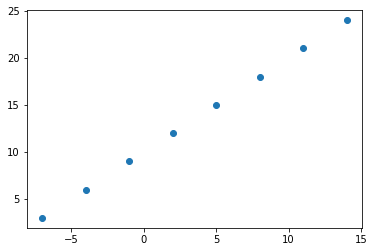

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# create features"
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x,y)

In [81]:
# create a demo tensor for our housing price predioction problem
house_info = tf.constant(["bedroom", "bathroom","garbage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garbage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [82]:
x[0], y[0]

(-7.0, 3.0)

In [83]:
x[1], y[1]

(-4.0, 6.0)

In [84]:
input_shape = x.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [85]:
x[0].ndim

0

In [86]:
x[0],y[0]

(-7.0, 3.0)

 ## 43. The major steps in modelling with TensorFlow

In [87]:
# turn our numpy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [88]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

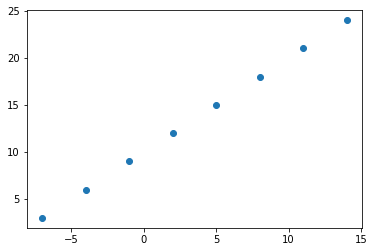

In [89]:
plt.scatter(x,y)

In [90]:
### steps in modeling with tensorflow

In [91]:
# 1 creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.

# 2 compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)

# 3. Fitting a model - letting the model try to find patterns between x & y (features and labels)

In [92]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)
# 5 EPOCHS

Epoch 1/5
1/1 [==============================] - 0s 245ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [93]:
# check out x and y
x , y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [94]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred
# I guess we were shooting for 17 but we got 12 instead

1/1 [==============================] - 0s 76ms/step


array([[12.716021]], dtype=float32)

## Improving a model

In [95]:
# alter the previous 3 steps

#     - 1. Creating a mode - add more layers, increase hidden neurons per layer, change the activation functions

#     - 2.Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
    
#     - 3.fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

## 45. Steps in improving a model with TensorFlow part 2

In [96]:
# 100 epochs
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

# Remind
x, y

# prdiction
model.predict([17.0])
# not getting the result we wanted even though mae and loss is lower
# are we overfitting - learning the training data 2 well. (but not so effective moving forward)

Epoch 1/100
1/1 [==============================] - 0s 275ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

array([[29.739855]], dtype=float32)

## 46. Steps in improving a model with TensorFlow part 3

In [97]:
# # Try again with layers deactivated
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(100, activation=None),
#   tf.keras.layers.Dense(1)
# ])

# model.compile(loss=tf.keras.losses.mae, 
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])

# model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# x,y,

# model.predict([17.0])

In [98]:
# Run again with Adam
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(100, activation=None),
#   tf.keras.layers.Dense(1)
# ])

# model.compile(loss=tf.keras.losses.mae, 
#               optimizer=tf.keras.optimizers.Adam(), # changed from 'SGD'
#               metrics=["mae"])

# model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# x,y,

# model.predict([17.0])
# # WORSE

In [99]:
# Increase adams learn rate
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # changed learning rate from default 'lr'
              metrics=["mae"])

model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

x,y,

model.predict([17.0])
# lowest loss and mae Ive seen 
# the result is lower

Epoch 1/100
1/1 [==============================] - 0s 324ms/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1686 - mae: 9.1686
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0478 - mae: 7.0478
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4552 - mae: 7.4552
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.7956 - mae: 7.7956
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.8033 - mae: 7.8033
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

array([[25.358276]], dtype=float32)

In [100]:
# it yells at me if I waste resources

## 47. Evaluating a TensorFlow model part 1 ("visualise, visualise, visualise")

In [101]:
# Build Model -> fit it > evaluate it > tweak a model > repeat as many times as it takes

# when it comes to evaluation its imporntant to visualize
# visualize:
    # the data-
    # the model itself-
    # the training of a model
    # the predictions of the modle 

In [102]:
# make bigger dataset
x = tf.range(-100,100,4)
x
# 5x more datapoints

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [103]:
# make labels for the dataset
y = x + 10
y
# ? we have the same shape (1 y value for every x value )

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

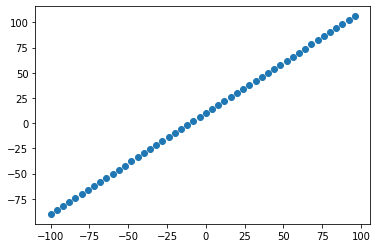

In [104]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
# scatterplot

# 48. Evaluating a TensorFlow model part 2 (the three datasets)

### The Three Sets ...

In [105]:
# Training- 70-80%

# VAlidation- 10-15%

# Test set -10-15%

In [106]:
# check the length of how many samples we have
len(x)

50

In [107]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = x[:40]



x_test = x[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizeing the data

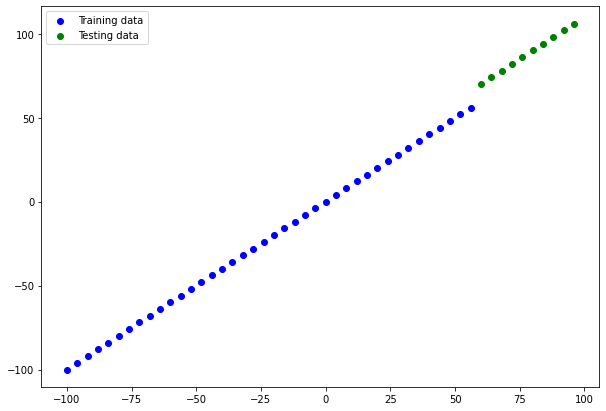

In [108]:
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, c='b', label='Training data')# Plot training data in blue
plt.scatter(x_test, y_test, c='g', label='Testing data')# Plot test data in green
plt.legend();# Show the legend

In [109]:
# wonder why it dosent line up

# 49. Evaluating a TensorFlow model part 3 (getting a model summary)

In [110]:
# build neural net for our data
# Starting off with a simple one from earlier, only 1 layer, 100 epochs

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit
# model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

## Visualizing the model

In [118]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            multiple                  0 (unused)
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.build([1])

In [127]:
# Create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

model = tf.keras.Sequential([
     tf.keras.layers.Dense(10,input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.summary()
# one input one output: thus output shape = 1
# total params - patterns the model is trying to learn0
# trainable params - updated during training
# non-trainable - not updated during trading (n typical with transfer learning)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [129]:
# fixing model to training data
model.fit(x_train, y_train, epochs=100, verbose=0)

# 50. Evaluating a TensorFlow model part 4 (visualising a model's layers)


In [130]:
from tensorflow.keras.utils import plot_model

In [131]:
plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
